<a href="https://colab.research.google.com/github/Aleksandra0001/DataScience/blob/main/HW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть третья: Анализ датасет c Kaggle.com


In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


В этой части домашней работы мы еще больше углубимся в библиотеку pandas и рассмотрим более продвинутые функции.

Для этого упражнения мы используем данные по Топ-50 рейтингу самых продаваемых книг на Amazon за 11 лет (с 2009 по 2019). Датасет находится в открытом доступе на [Kaggle.com](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Загрузите csv файл по ссылке и переместите его в ту же директорию, где находится ваш рабочий ноутбук (для удобства). После этого переходите к заданию

Для выполнения этой части домашнего задания, нужно будет не только написать код, но и ответить на сопутствующие вопросы. Там, где вы увидите выделенную жирным шрифтом надпись ответ:, нужно будет вставить вопрос в файл и ответ на него.

Для каждой из книг доступно 7 переменных(колонок). Давайте рассмотрим их детальней:

Name - название книги

Author - автор

User Rating - рейтинг (по 5-бальной шкале)

Reviews - количество отзывов

Price - цена (в долларах по состоянию на 2020 год)

Year - год, когда книга попала в рейтинг Топ-50

Genre - жанр

Для упрощения последующей работы, давайте немного подправим названия переменных. Как видите, здесь все названия начинаются с большой буквы, а одно - даже содержит пробел. Это крайне нежелательно и может быть достаточно неудобным. Давайте сменим регистр на маленький, а пробел заменим на нижнее подчеркивания (snake_style). А заодно и выучим полезный атрибут датафрейма: columns (можно просто присвоить список новых имен этому атрибуту)

**Прочитайте csv файл (используйте функцию read_csv)**


In [4]:
url='https://drive.google.com/file/d/1MTlnE7r9gN-GQXXNnrGq45VnuYRhYhgd/view?usp=share_link'
url='https://drive.google.com/uc?id='+ url.split('/')[-2]
data = pd.read_csv(url)
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

**Выведите первый пять строчек (используется функцию head)**


In [77]:
data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Выведите размеры датасета (используйте атрибут shape)**


In [6]:
data.shape

(550, 7)

О скольки книгах хранит данные датасет? **Ответ:** **<font color='green'>351</font>**

In [7]:
name_count=data.drop_duplicates('name').shape[0]
name_count

351

# Первичное исследование данных

Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)


In [8]:
data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Есть ли в каких либо переменных пропуски? **Ответ:** **<font color='green'>Нет
</font>**


**Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)**


In [9]:
unique_genre=data.genre.unique()
unique_genre

array(['Non Fiction', 'Fiction'], dtype=object)

Какие есть уникальные жанры? **Ответ:** **<font color='green'>'Non Fiction', 'Fiction'
</font>**


Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85e41e1940>]],
      dtype=object)

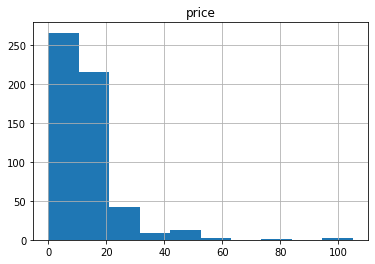

In [10]:
data.hist(column='price')

Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)


In [11]:
data.groupby('name').agg({'price':['min', 'max', 'mean', 'median']})


price                 
                                                     min max  mean median
name                                                                     
10-Day Green Smoothie Cleanse                          8   8   8.0    8.0
11/22/63: A Novel                                     22  22  22.0   22.0
12 Rules for Life: An Antidote to Chaos               15  15  15.0   15.0
1984 (Signet Classics)                                 6   6   6.0    6.0
5,000 Awesome Facts (About Everything!) (Nation...    12  12  12.0   12.0
...                                                  ...  ..   ...    ...
Winter of the World: Book Two of the Century Tr...    15  15  15.0   15.0
Women Food and God: An Unexpected Path to Almos...    11  11  11.0   11.0
Wonder                                                 9   9   9.0    9.0
Wrecking Ball (Diary of a Wimpy Kid Book 14)           8   8   8.0    8.0
You Are a Badass: How to Stop Doubting Your Gre...     8   8   8.0    8.0

[351 rows x 4 columns]

Ответ: Mаксимальная цена?


In [12]:
data.agg({'price':['max']})


,price
max,105


Ответ: Минимальная цена?


In [13]:
data.agg({'price':['min']})

,price
min,0


Ответ: Средняя цена?


In [14]:
data.agg({'price':['mean']})

,price
mean,13.1


Ответ: Медианная цена?


In [15]:
data.agg({'price':['median']})

,price
median,11.0


# Поиск и сортировка данных

Ответ: Какой рейтинг в датасете наивысший? Ответ:


In [16]:
max_rate=data['user_rating'].max()
max_rate

4.9

Ответ: Сколько книг имеют такой рейтинг? Ответ:


In [17]:
data[data["user_rating"] == max_rate].shape[0]

52

Ответ: У какой книги больше всего отзывов? Ответ:


In [18]:
review_max=data['reviews'].max()
data[data['reviews']==review_max]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ:


In [19]:
most_exp=data.price.max()
data[data['price']==most_exp]

,name,author,user_rating,reviews,price,year,genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:


In [20]:
data[(data['year']== 2010)&(data['genre']== 'Fiction')]['name'].count()

20

Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:


In [99]:
count_books = data[(data['year'].isin([2010, 2011])) & (data['user_rating'] == max_rate)]
count_books

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).


In [100]:
books_price = data[(data['year'] == 2015) & (data['price'] < 8)]
books_price.sort_values(by='price', ascending=True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Ответ: Какая книга последняя в отсортированном списке? Ответ:


In [111]:
books_price.sort_values(by='price', ascending=False).iloc[0:1].name

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

# Агрегирование данных и соединения таблиц

Последняя секция этого домашнего задания включает чуть более продвинутые функции. Но не волнуйтесь, pandas делает все операции простыми и понятными.



Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

In [24]:
data.groupby('genre').agg({'price':['max','min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Ответ: Максимальная цена для жанра Fiction: Ответ

In [25]:
data[(data['genre']== 'Fiction')]['price'].max()

82

Ответ: Минимальная цена для жанра Fiction: Ответ


In [26]:
data[(data['genre']== 'Fiction')]['price'].min()

0

Ответ: Максимальная цена для жанра Non Fiction: Ответ


In [27]:
data[(data['genre']== 'Non Fiction')]['price'].max()

105

Ответ: Минимальная цена для жанра Non Fiction: Ответ


In [28]:
data[(data['genre']== 'Non Fiction')]['price'].min()

0

Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные


In [29]:
author_books=data.groupby(['author'])[['name']].count()
author_books

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Ответ: Какой размерности вышла таблица? Ответ:


In [112]:
author_books.shape

(248, 1)

Ответ: У какого автора больше всего книг? Ответ:


In [30]:
max_author_books=author_books[author_books['name'] == author_books['name'].max()]
max_author_books

,name
author,
Jeff Kinney,12


Ответ: Сколько книг у этого автора? Ответ:


In [31]:
max_author_books

,name
author,
Jeff Kinney,12


Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные


In [44]:
mean_rate=data.groupby('author').agg('user_rating').mean().round(1)
mean_rate

author
Abraham Verghese              4.6
Adam Gasiewski                4.4
Adam Mansbach                 4.8
Adir Levy                     4.8
Admiral William H. McRaven    4.7
                             ... 
Walter Isaacson               4.6
William Davis                 4.4
William P. Young              4.6
Wizards RPG Team              4.8
Zhi Gang Sha                  4.6
Name: user_rating, Length: 248, dtype: float64

Ответ: У какого автора средний рейтинг минимальный? Ответ:


In [46]:
auth=mean_rate.nsmallest(1)

author
Donna Tartt    3.9
Name: user_rating, dtype: float64

Ответ: Какой у этого автора средний рейтинг? Ответ:


In [53]:
data[(data['author']== 'Donna Tartt')]['user_rating'].mean()

3.9

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную


In [57]:
rate_book=pd.concat([author_books,mean_rate], axis=1)
rate_book


,name,user_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7
...,...,...
Walter Isaacson,3,4.6
William Davis,2,4.4
William P. Young,2,4.6


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)


In [66]:
sorted_list=rate_book.sort_values(by=['name', 'user_rating'],ascending=True)
sorted_list

,name,user_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
...,...,...
American Psychological Association,10,4.5
Gary Chapman,11,4.7
Suzanne Collins,11,4.7


Ответ: Какой автор первый в списке?


In [76]:
sorted_list.nsmallest(1, columns='name')

,name,user_rating
author,,
Muriel Barbery,1,4.0
